# Testing View Graph

## Creating View Graph

In [1]:
# Parameters
from Parameters import Parameters

# Utitlies for mathematical calculation, isovist and visualization
from Isovist import Isovist
from Plotter import Plotter
from Utility import Utility

# Container -> Environment -> View Graph
from Container import Container
from Environment import IndoorEnvironment
from ViewGraph import ViewGraph

In [2]:
Parameters.set_env("real")  # this can be set to "basic" environment, "hypo" environment as well
Parameters.print_info()

--------------------------------------
Real-world environment is active

Static Variables: 
	epsilon: 0.01
	precision: 2
	alpha: 40
	fov: 160
	min_area: 1000000
	max_area: 1000000
	door_weight: 50
	turn_weight: 0.05
--------------------------------------


In [3]:
def read_env():
    # Basic environment
    if Parameters.basic:
        address = 'envs/basic/'
        pfiles = ['t_bound.geojson']
        hfiles = [None]
        dfiles = ['t_doors.geojson']
        dpfiles = [None]
        lfiles = ['t_landmarks.geojson']
        # create an indoor environment
        ie = IndoorEnvironment(address, pfiles, hfiles, dfiles, dpfiles, lfiles)

    # Hypo environment
    elif Parameters.hypo:
        address = 'envs/hypo/'
        pfiles = ['hypo_env.geojson']
        hfiles = ['hypo_holes.geojson']
        dfiles = ['hypo_doors.geojson']
        dpfiles = ['hypo_dpoints.geojson']
        lfiles = ['hypo_landmarks.geojson']
        # create an indoor environment
        ie = IndoorEnvironment(address, pfiles, hfiles, dfiles, dpfiles, lfiles)

    # MC5 real world environment
    else:
        address = 'envs/mc-floor-5/'
        pfiles, hfiles, dfiles, dpfiles, lfiles = IndoorEnvironment.reformat(
            address, 'containers.geojson', 'doors.geojson', 'landmarks.geojson')
        # create an indoor environment
        ie = IndoorEnvironment('', pfiles, hfiles, dfiles, dpfiles, lfiles)
    return ie

ie = read_env()

environment files -- count is valid
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)
reading GeoJSON files (boundary, holes, doors and decision points)


In [4]:
# create view graph
vgs, isovist_objects = ie.construct_view_graph()


*******************************************
Analyzing: Emergency Stairs
Container environment is valid: True
region initial : 1
regions : 1 -- 1
calculating the visibility signatures...
calculating adjacency matrix for regions
finding regions that contains doors/gateways and decision points
decompose views
len: 12
constructing view graph for regions
calculating all spatial relationships visible in each view
Adding actions to views (nodes)
Adding actions to view relations (edges)

*******************************************
Analyzing: Women Toilet
Container environment is valid: True
region initial : 3
regions : 4 -- 3
calculating the visibility signatures...
calculating adjacency matrix for regions
finding regions that contains doors/gateways and decision points
decompose views
len: 49
constructing view graph for regions
calculating all spatial relationships visible in each view
Adding actions to views (nodes)
Adding actions to view relations (edges)

*********************************

## Testing View Graph 

### Connectivity
Is the resulted view graph connected? If not, what are the components and why there is connectivity issue?

In [5]:
import networkx as nx

for idx, vg in enumerate(vgs):
    print('id: {2} -- {0} is connected? {1}'.format(vg.name, nx.is_strongly_connected(vg.rviewgraph), idx))
    
# all view graphs are connected!

id: 0 -- Emergency Stairs is connected? True
id: 1 -- Women Toilet is connected? True
id: 2 -- Disabled Toilet is connected? True
id: 3 -- Men Toilet is connected? True
id: 4 -- Corridor is connected? True
id: 5 -- Active Hub is connected? True
id: 6 -- Stairs to Lower Floors is connected? True
id: 7 -- Ngi-a Djerring Gat-ith is connected? True
id: 8 -- UX Lab is connected? True


### Shortest Path Calculation and Route Instructions

In [6]:
info = {}
# stairs to lower floors -> door (0)
info['door to corridor'] = isovist_objects[0].door_points[0]

In [7]:
# corridor - door to Male toilet (5), door to active hub (7)
print(vgs[4].door_info)
info['door to Male toilet'] = isovist_objects[4].door_points[5]
info['door to Active hub'] = isovist_objects[4].door_points[7]

['the door to workplace', 'the door to workplace', 'the door to emergency stairs', 'the door to disabled toilet', 'the door to women toilet', 'the door to male toilet', 'the door to ux lab', 'the door to active hub', 'decision point 0', 'decision point 1', 'decision point 2', 'decision point 3']


In [8]:
# Active hub -> door to UX lab (4), door to NDG space (1? 2?)
print(vgs[5].door_info)
info['door to NDG space'] = isovist_objects[5].door_points[1]
info['door to UX lab'] = isovist_objects[5].door_points[4]

['the door to corridor', 'the door to ndg space', 'the door to ndg space', 'the door to room 5331', 'the door to ux lab', 'decision point 0', 'decision point 1', 'decision point 2', 'decision point 3', 'decision point 4', 'decision point 5']


In [9]:
# NDG door to stairs
print(vgs[7].door_info)

colors = ['ro', 'go', 'bo', 'yo', 'mo']

['the door to stairs', 'the door to active hub', 'the door to active hub', 'the door to room 5330', 'the door to workplace', 'the door to workplace', 'decision point 0', 'decision point 1']


Checking The connection between the view graphs -> into the large graph representation.

enter: Corridor
enter: Active Hub
enter: Ngi-a Djerring Gat-ith
enter: Stairs to Lower Floors


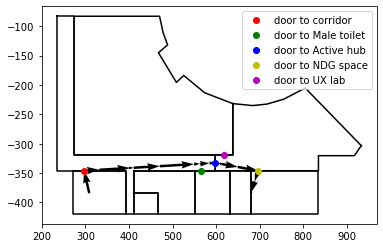

<Figure size 432x288 with 0 Axes>

In [10]:
# todo: set parameters to Parameters class
start_container = 'Emergency Stairs'
start_region = 0
end_container = 'Stairs to Lower Floors'
end_region = 0
vp, pv = ie.shortest_path(start_container, start_region, end_container, end_region)

# plot shortest path
plotter = Plotter()
for isovist_object in ie.isovist_objects:
    plotter.add_poly(isovist_object.space_x, isovist_object.space_y)

counter = 0
for key, val in info.items():
    color = colors[counter]
    counter += 1
    plotter.add_points([val], key, color=color)
plotter.add_views(pv[1:])
plotter.get_plt().legend()
plotter.get_plt().savefig('path.png', dpi=300)
plotter.show()
plotter.close()

In [11]:
from shapely.geometry import Point

def exaggerate(pv, e_factor=50):
    p1 = pv[0]
    p2 = pv[1]
    dx = p2.x - p1.x
    dy = p2.y - p1.y
    p2_new = Point(p1.x+dx*e_factor, p1.y+dy*e_factor)
    return [p1, p2_new]

In [12]:
vp

['Emergency Stairs-V1',
 'Emergency Stairs-V8',
 'Emergency Stairs-V9',
 'Corridor-V208',
 'Corridor-V209',
 'Corridor-V210',
 'Corridor-V211',
 'Corridor-V212',
 'Corridor-V213',
 'Corridor-V214',
 'Corridor-V215',
 'Corridor-V216',
 'Corridor-V217',
 'Active Hub-V745',
 'Active Hub-V746',
 'Active Hub-V747',
 'Active Hub-V748',
 'Active Hub-V749',
 'Ngi-a Djerring Gat-ith-V45',
 'Ngi-a Djerring Gat-ith-V46',
 'Ngi-a Djerring Gat-ith-V47',
 'Stairs to Lower Floors-V0']

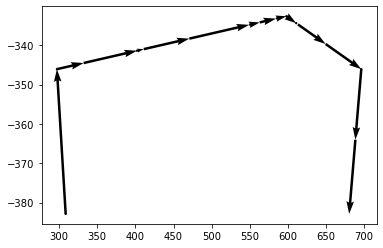

<Figure size 432x288 with 0 Axes>

In [13]:
plotter = Plotter()
plotter.add_views([p for p in pv[1:-1]])
plotter.show(False)
plotter.close()

In [14]:
ie.graph['Women Toilet-V5']

AtlasView({'Women Toilet-V53': {'weight': 193362.09623931133, 'label': 'move', 'action': 'turn back'}, 'Women Toilet-V55': {'weight': 193362.09623931133, 'label': 'move', 'action': 'turn back'}, 'Women Toilet-V58': {'weight': 193362.09623931133, 'label': 'move', 'action': 'turn back'}, 'Women Toilet-V61': {'weight': 193362.09623931133, 'label': 'move', 'action': 'turn back'}, 'Women Toilet-V65': {'weight': 193362.09623931133, 'label': 'move', 'action': 'turn back'}, 'Corridor-V944': {'weight': 193412.09623931133, 'label': 'Enter the door to corridor and turn left', 'action': 'enter'}, 'Corridor-V947': {'weight': 193412.09623931133, 'label': 'Enter the door to corridor and turn left', 'action': 'enter'}, 'Corridor-V949': {'weight': 193412.09623931133, 'label': 'Enter the door to corridor and turn left', 'action': 'enter'}, 'Corridor-V951': {'weight': 193412.09623931133, 'label': 'Enter the door to corridor and follow', 'action': 'enter'}, 'Corridor-V954': {'weight': 193412.09623931133, 

Generate route descriptions

In [15]:
# generate route instructions
def generate_route_descriptions(vp):
    container = ''
    container_vids = {}
    finals = {}
    for v in vp[1:-1]:
        info = v.split('-V')
        if container != info[0]:
            container = info[0]
            container_vids[container] = []
        container_vids[container].append(int(info[1]))
#     print(container_vids)
    last_container = container
    first_vid = -1
    last_vid = -1
    for container, vids in container_vids.items():
        cidx = ie.containers_names.index(container)
        vg = vgs[cidx]
#         print(cidx)
#         print(vids)
        rds = vg.generate_route_description(vids, 
                                            with_localization = (first_vid == -1), 
                                            with_destination = (container == last_container))
        
        
        first_vid = '{0}-V{1}'.format(container, vids[0])
        if last_vid != -1:
#             print(last_vid)
#             print(first_vid)
            finals[container] = [ie.graph[last_vid]['{0}-V{1}'.format(container, vids[0])]['label']]
            finals[container].extend(rds)
        else:
            finals[container] = rds
        last_vid = '{0}-V{1}'.format(container, vids[-1])
        
    return finals


rds = generate_route_descriptions(vp)
all_instructions = []
for instructions in rds.values():
    all_instructions.extend(instructions)
Utility.print_instructions(all_instructions)

************Verbal Description**************
	Head towards decision point 0
	Enter the door to corridor and veer right
	Pass the door to male toilet
	Enter the door to active hub and follow
	Pass the door to ux lab
	Enter the door to ndg space and turn right
	Pass the door to active hub and move forward until you reach the destination
********************END*********************



In [16]:
length_dictionary = {}
lengths = []
for vg in vgs:
    for key, val in vg.rview_ls.items():
        length_dictionary['{0}-V{1}'.format(vg.name, key)] = val.length
        lengths.append(val.length)

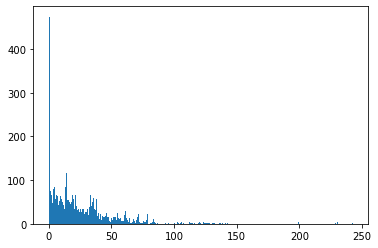

In [17]:
import matplotlib.pyplot as plt

plt.hist([l for l in lengths], bins=300)
plt.show()  # issue: Very small views -> can a person experience this view?

In [18]:
small = 0
for l in lengths:
    if l < 0.1:
        small += 1
print('{0} small views out of {1}'.format(small, len(lengths)))

410 small views out of 3460


### Navigation Graphs

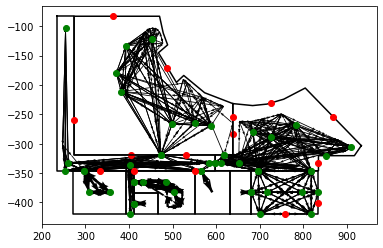

<Figure size 432x288 with 0 Axes>

In [19]:
plotter = Plotter()
for isovist_object in ie.isovist_objects:
    plotter.add_isovist(isovist_object)
for vg in vgs:
    plotter.add_views(vg.rviews.values())
plotter.show(False)
plotter.close()

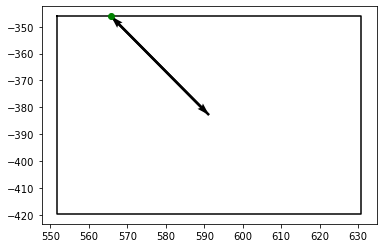

<Figure size 432x288 with 0 Axes>

In [20]:
def plot_all_views_container(idx):
    plotter = Plotter()
    plotter.add_isovist(isovist_objects[idx])
    plotter.add_views(vgs[idx].rviews.values())
    plotter.show(False)
    plotter.close()
    
plot_all_views_container(3)

In [21]:
for vg in vgs:
    print('{0}::{1}'.format(vg.name, len(vg.regions_list)))

Emergency Stairs::1
Women Toilet::4
Disabled Toilet::1
Men Toilet::1
Corridor::10
Active Hub::12
Stairs to Lower Floors::1
Ngi-a Djerring Gat-ith::1
UX Lab::12


derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph
derive navigation graph using spanning tree from viewgraph


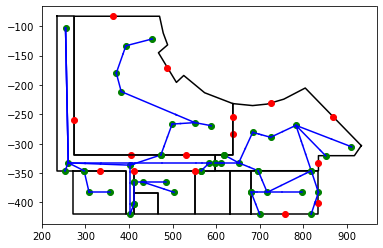

In [22]:
plotter = Plotter()
for idx, vg in enumerate(vgs):
    isovist_object = isovist_objects[idx]
    plotter.add_isovist(isovist_object)
    vps, pvs, st_vps, st_pvs, nvgraph = vg.generate_navigation_graph(isovist_object, indirect_access=False)
    for pv in st_pvs:
        plotter.add_points_lines(pv, is_vis=False)
plotter.show(False)

### Place Graph (Example)

In [23]:
print(vgs[4].door_info)
print(vgs[4].landmark_info)


['the door to workplace', 'the door to workplace', 'the door to emergency stairs', 'the door to disabled toilet', 'the door to women toilet', 'the door to male toilet', 'the door to ux lab', 'the door to active hub', 'decision point 0', 'decision point 1', 'decision point 2', 'decision point 3']
['the landmark 0', 'the landmark 1', 'the landmark 2', 'the landmark 3']


In [24]:
info = {}
info['door to disabled toilet'] = isovist_objects[4].door_points[3]
info['door to women toilet'] = isovist_objects[4].door_points[4]
info['landmark 2'] = isovist_objects[4].landmarks_points[2]

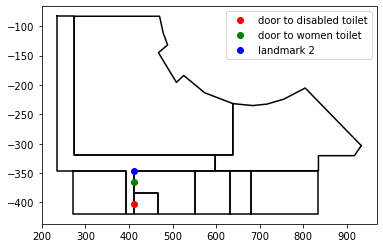

<Figure size 432x288 with 0 Axes>

In [25]:
plotter = Plotter()
for isovist_object in ie.isovist_objects:
    plotter.add_poly(isovist_object.space_x, isovist_object.space_y)

counter = 0
for key, val in info.items():
    color = colors[counter]
    counter += 1
    plotter.add_points([val], key, color=color)
plotter.get_plt().legend()
plotter.get_plt().savefig('configuration.png', dpi=300)
plotter.show()
plotter.close()

### View Decomposition


In [26]:
isovist_object = isovist_objects[4]  # corridor
vg = vgs[4]

In [27]:
print('total number of views {}'.format(len(vg.rviews)))

total number of views 966


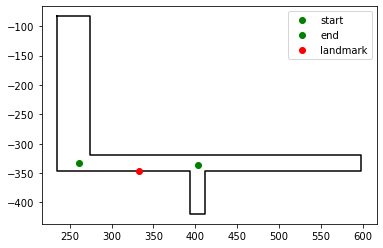

<Figure size 432x288 with 0 Axes>

In [28]:
plotter = Plotter()
plotter.add_poly(isovist_object.space_x, isovist_object.space_y)
plotter.add_points([isovist_object.door_points[8]], 'start', color='go')
plotter.add_points([isovist_object.door_points[9]], 'end', color='go')
plotter.add_points([isovist_object.landmarks_points[0]], 'landmark', color='ro')
plotter.show()
plotter.close()

In [29]:
vg.from_door_vids[8]

[279,
 281,
 284,
 287,
 294,
 298,
 306,
 313,
 319,
 324,
 329,
 332,
 338,
 341,
 348,
 352,
 360,
 364]

In [30]:
vg.to_door_vids[9]

[1,
 125,
 183,
 222,
 237,
 270,
 363,
 453,
 518,
 566,
 639,
 703,
 747,
 800,
 850,
 867,
 872,
 877,
 884]

In [41]:
vlist = [361, 362, 363]

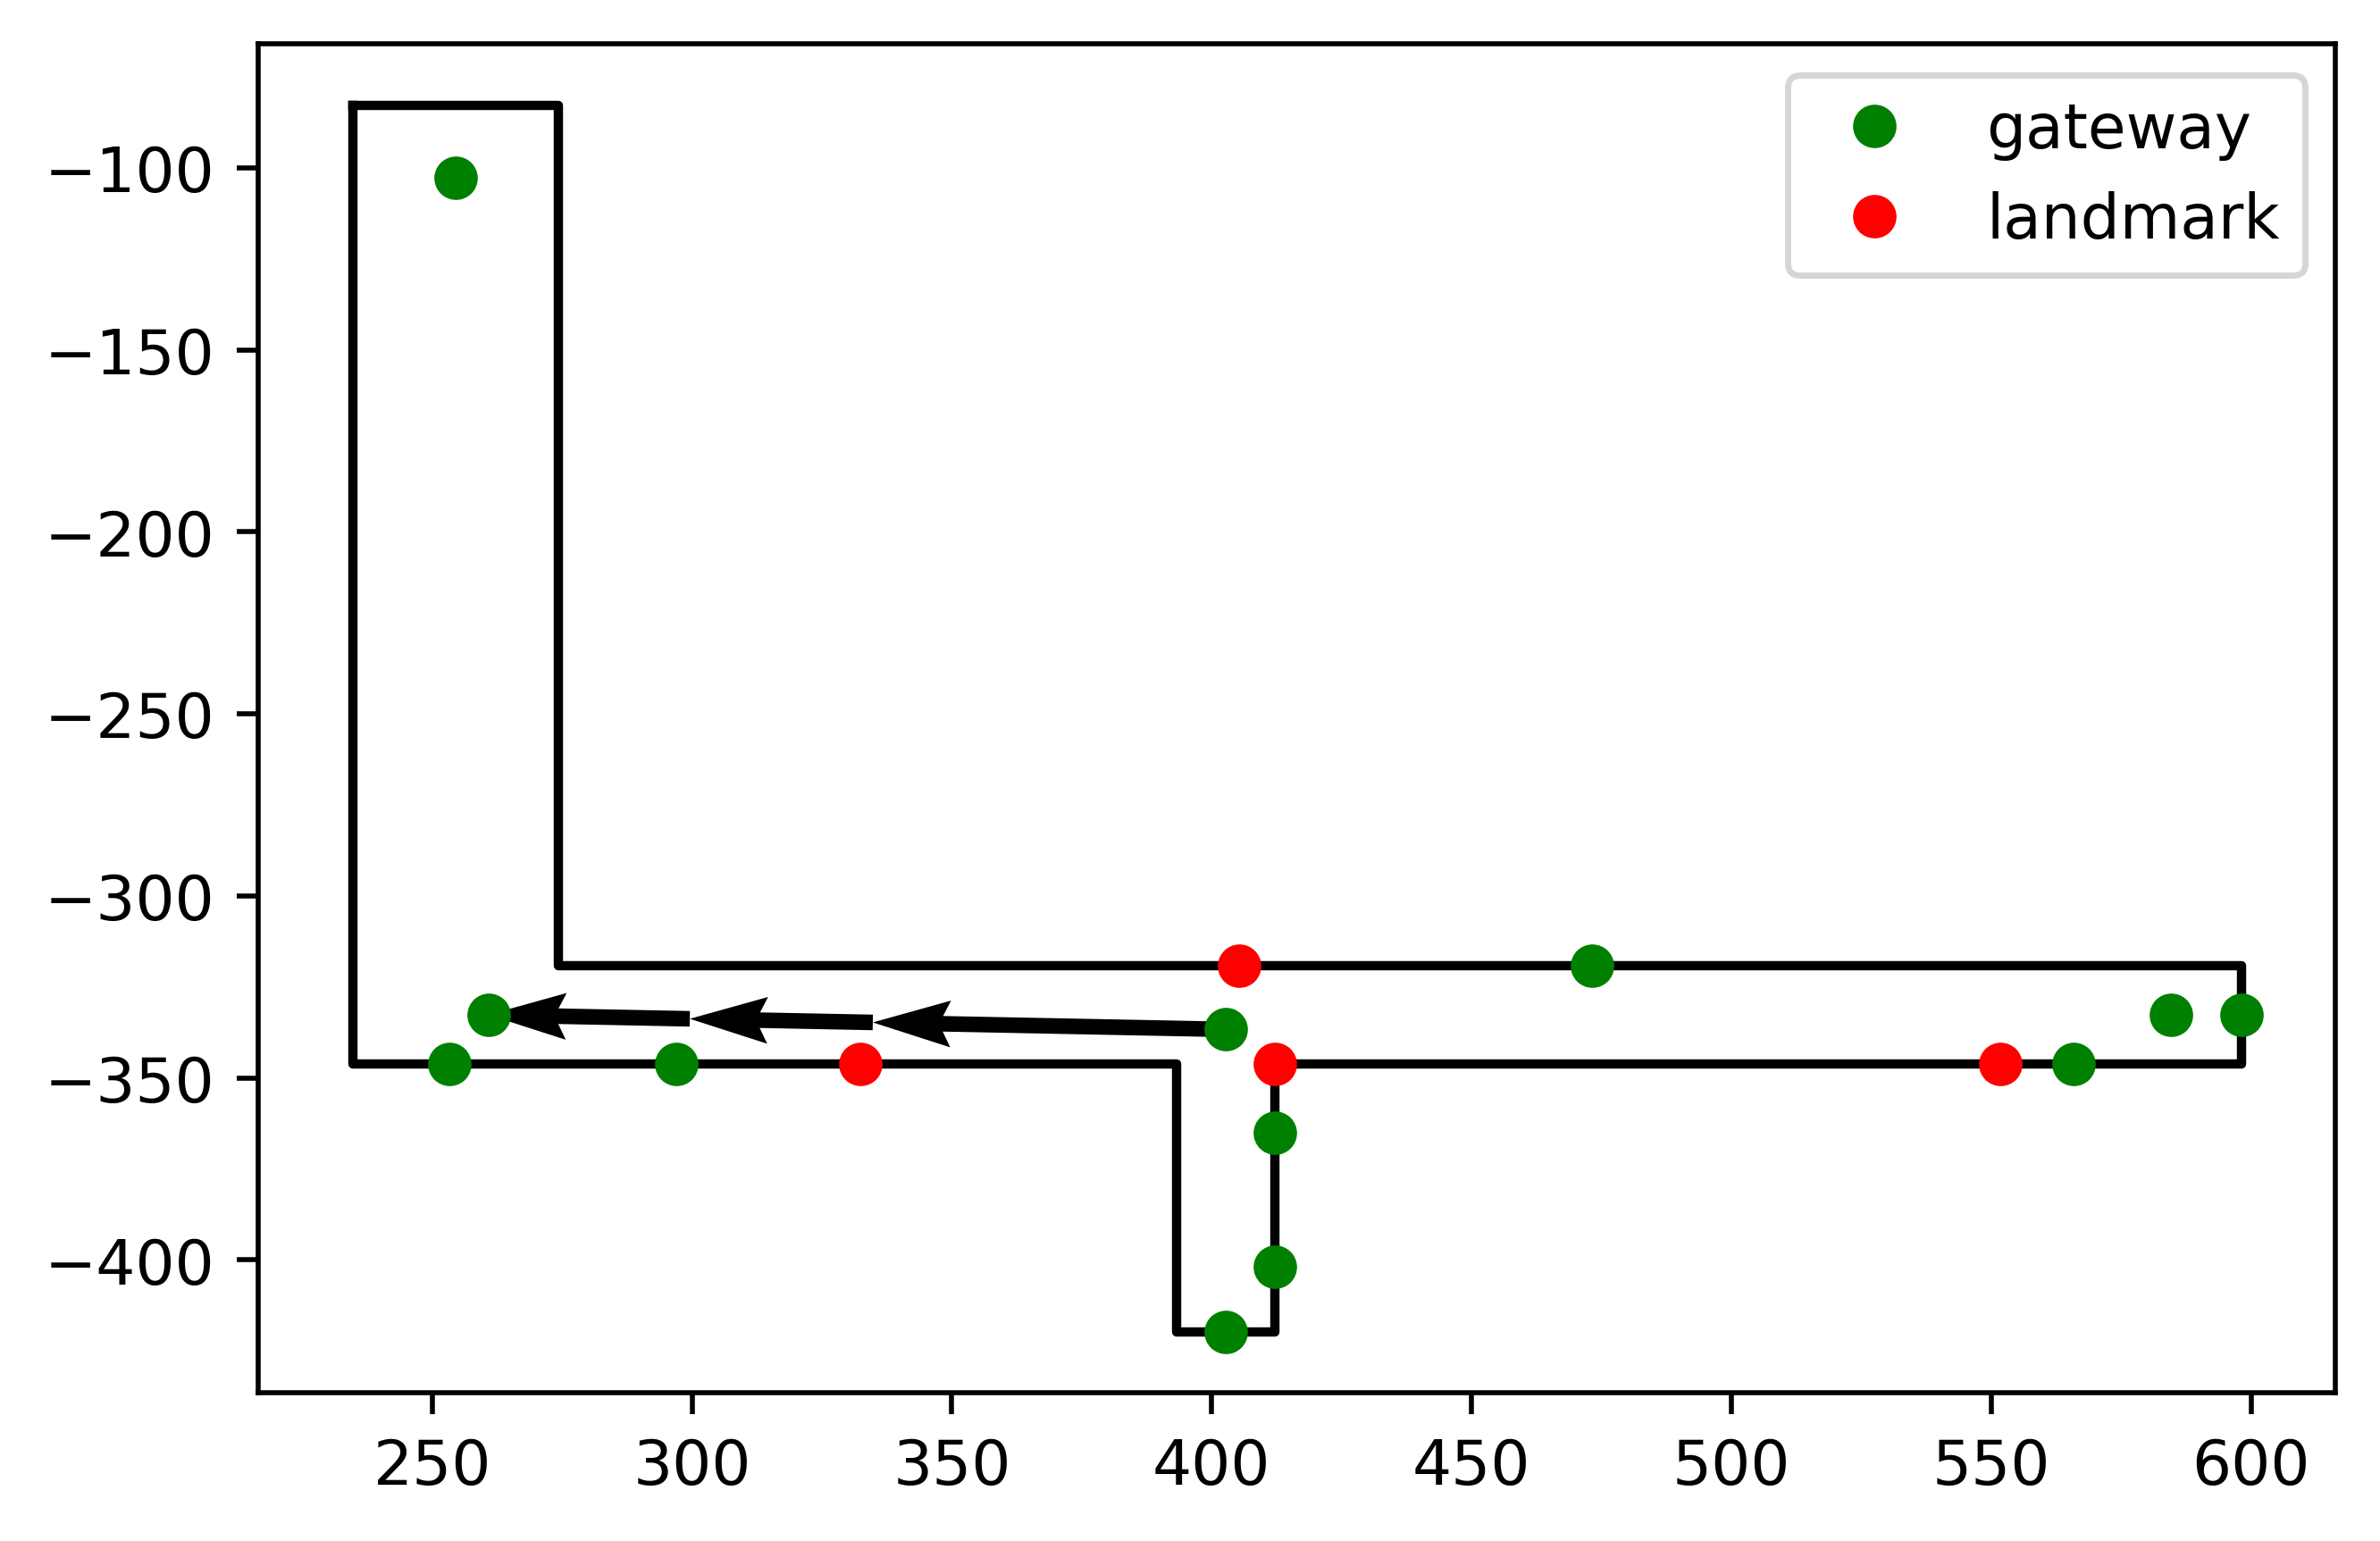

<Figure size 3000x2000 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 500

plotter = Plotter()
plotter.add_isovist(isovist_object)
plotter.add_views([vg.rviews[idx] for idx in vlist])
plotter.show()
plotter.close()

In [33]:
from shapely.geometry import Point, LineString
lpoint = Point(isovist_object.landmarks_points[0].x(), isovist_object.landmarks_points[0].y())
startpoint = Point(isovist_object.door_points[8].x(),isovist_object.door_points[8].y())
endpoint = Point(isovist_object.door_points[9].x(), isovist_object.door_points[9].y())
vl = LineString([startpoint, endpoint])
d = vl.project(lpoint)

In [34]:
d

69.88097014898085

In [35]:
from shapely.ops import nearest_points
import math
from numpy import tan

point = vl.interpolate(d)
# p1, p2 = nearest_points(vl, point)
a = (90 - 160 / 2) / 180 * math.pi  # fov = 160
shift = tan(a) * point.distance(lpoint)
d_correct = d - shift

In [36]:
shift

2.016133077362842

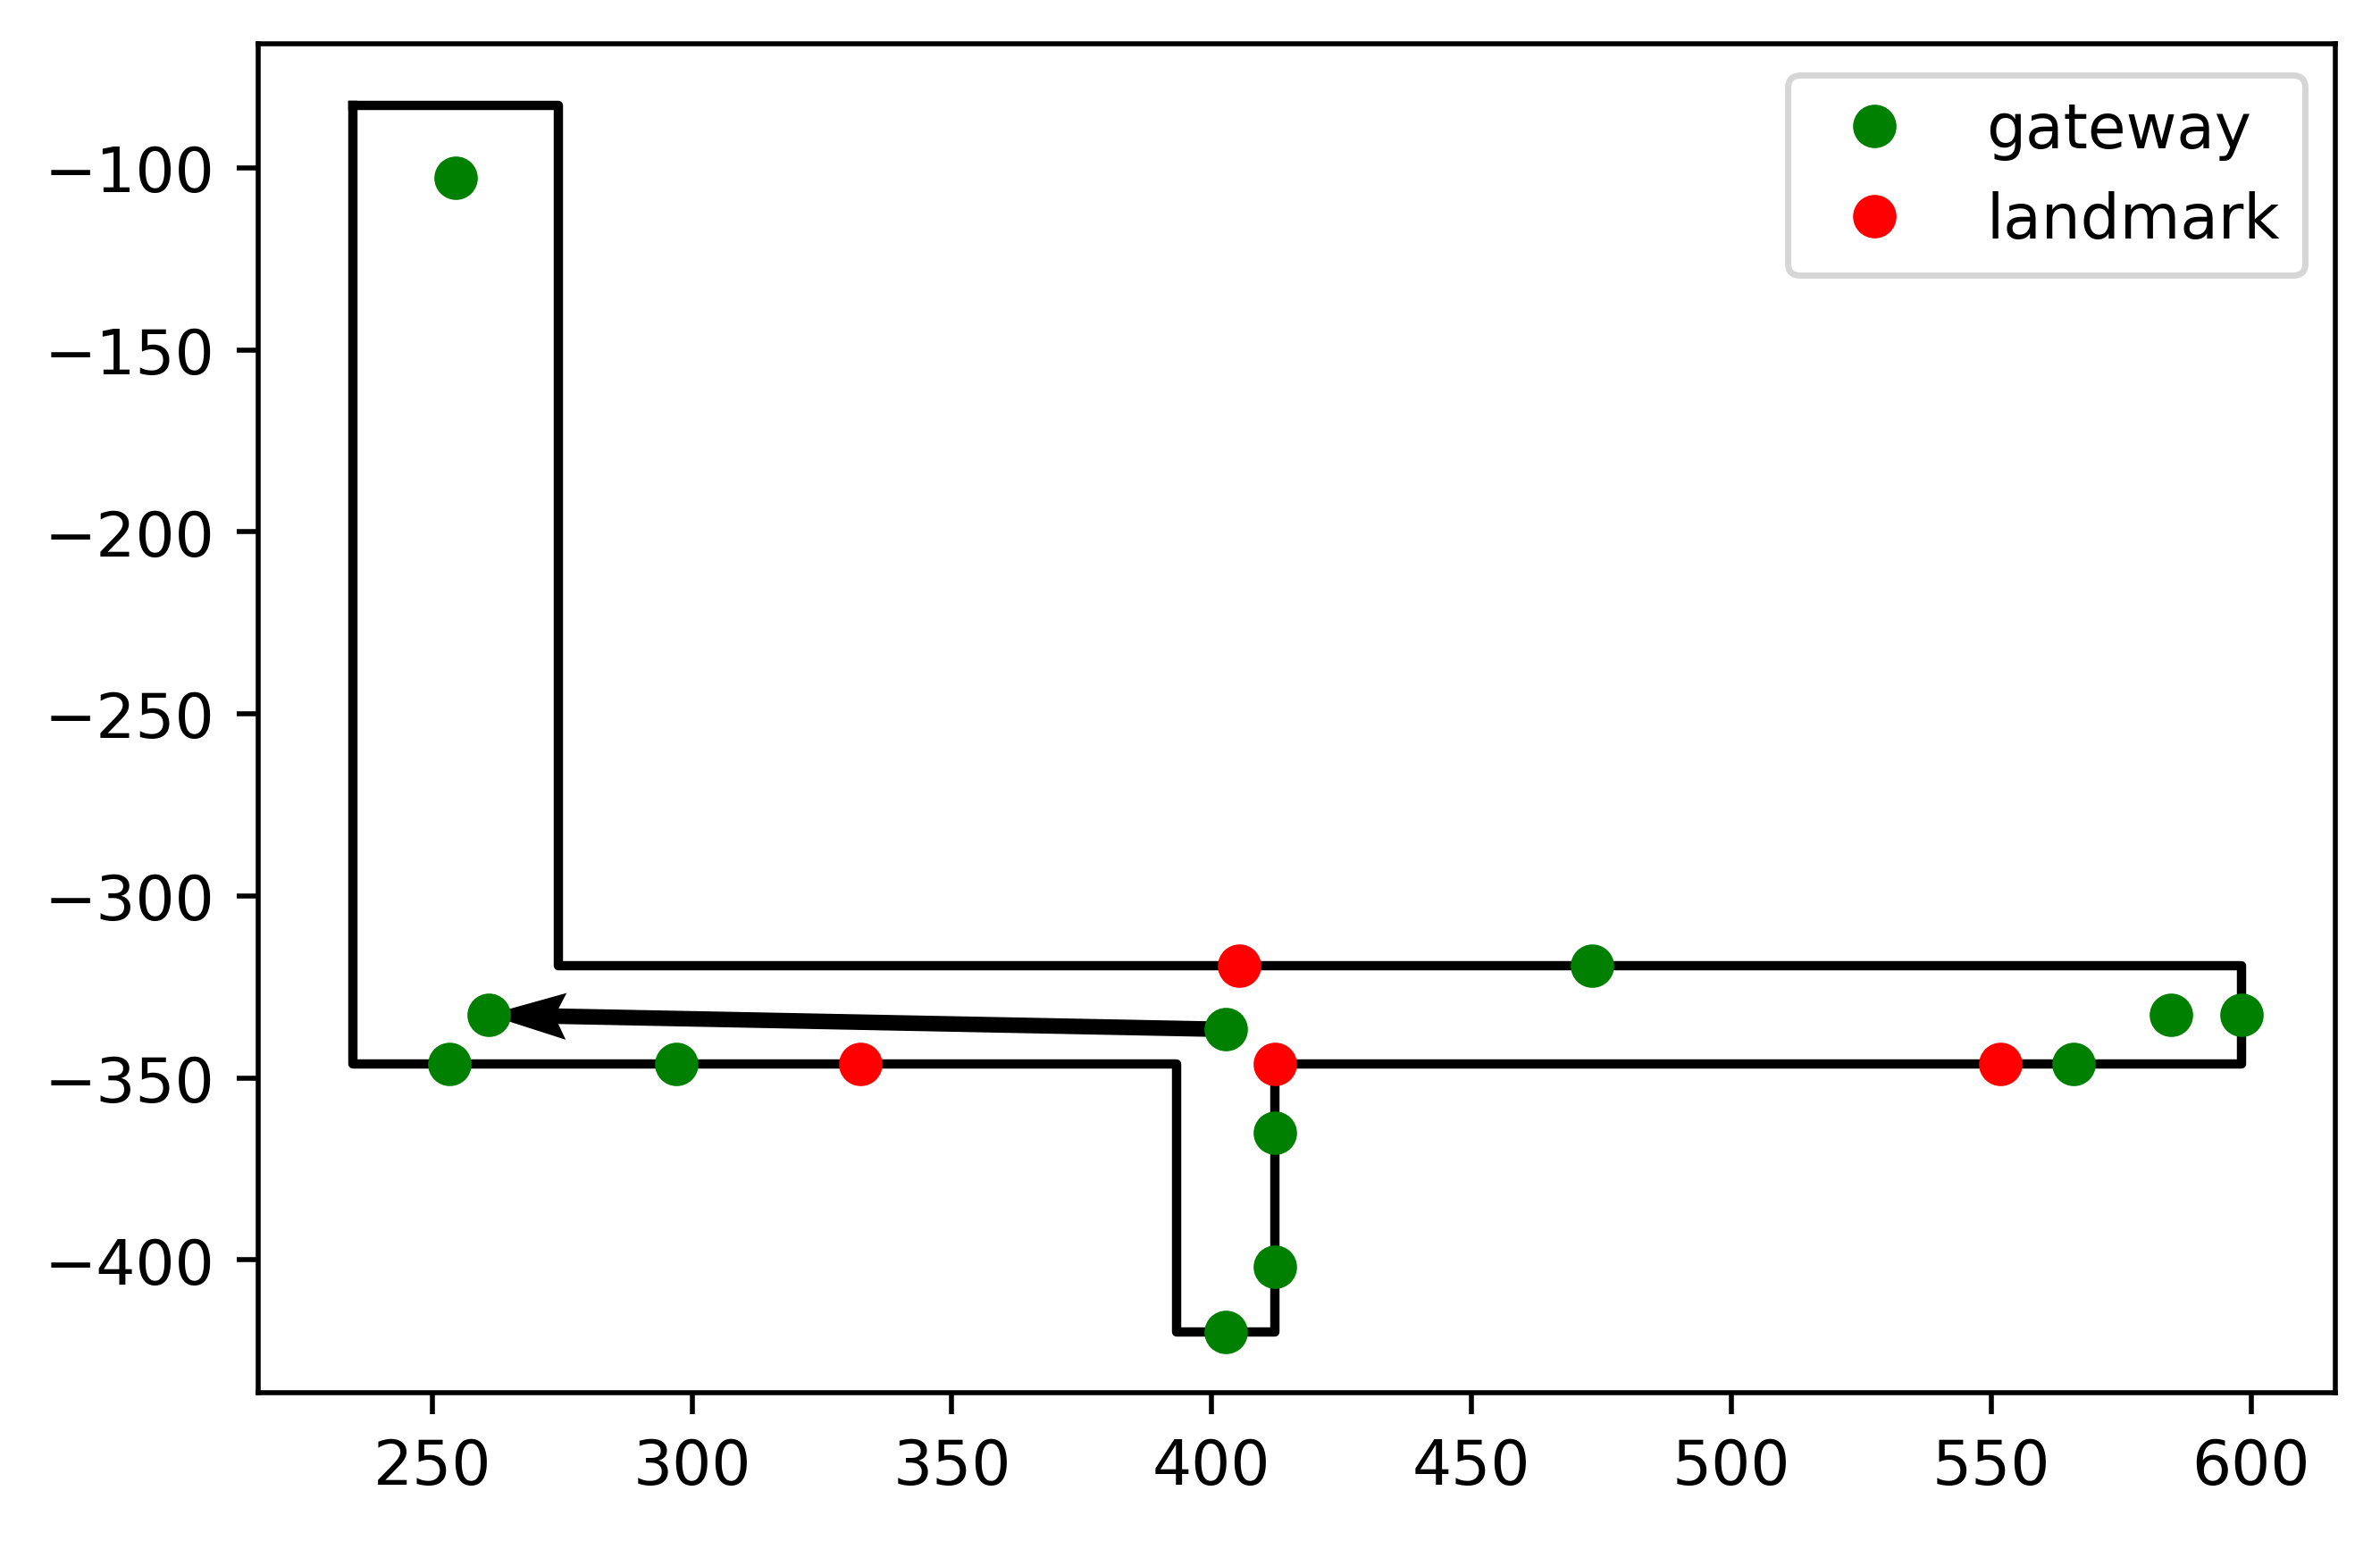

<Figure size 3000x2000 with 0 Axes>

In [44]:
plotter = Plotter()
plotter.add_isovist(isovist_object)
plotter.add_views([[startpoint, endpoint]])
plotter.show()
plotter.close()

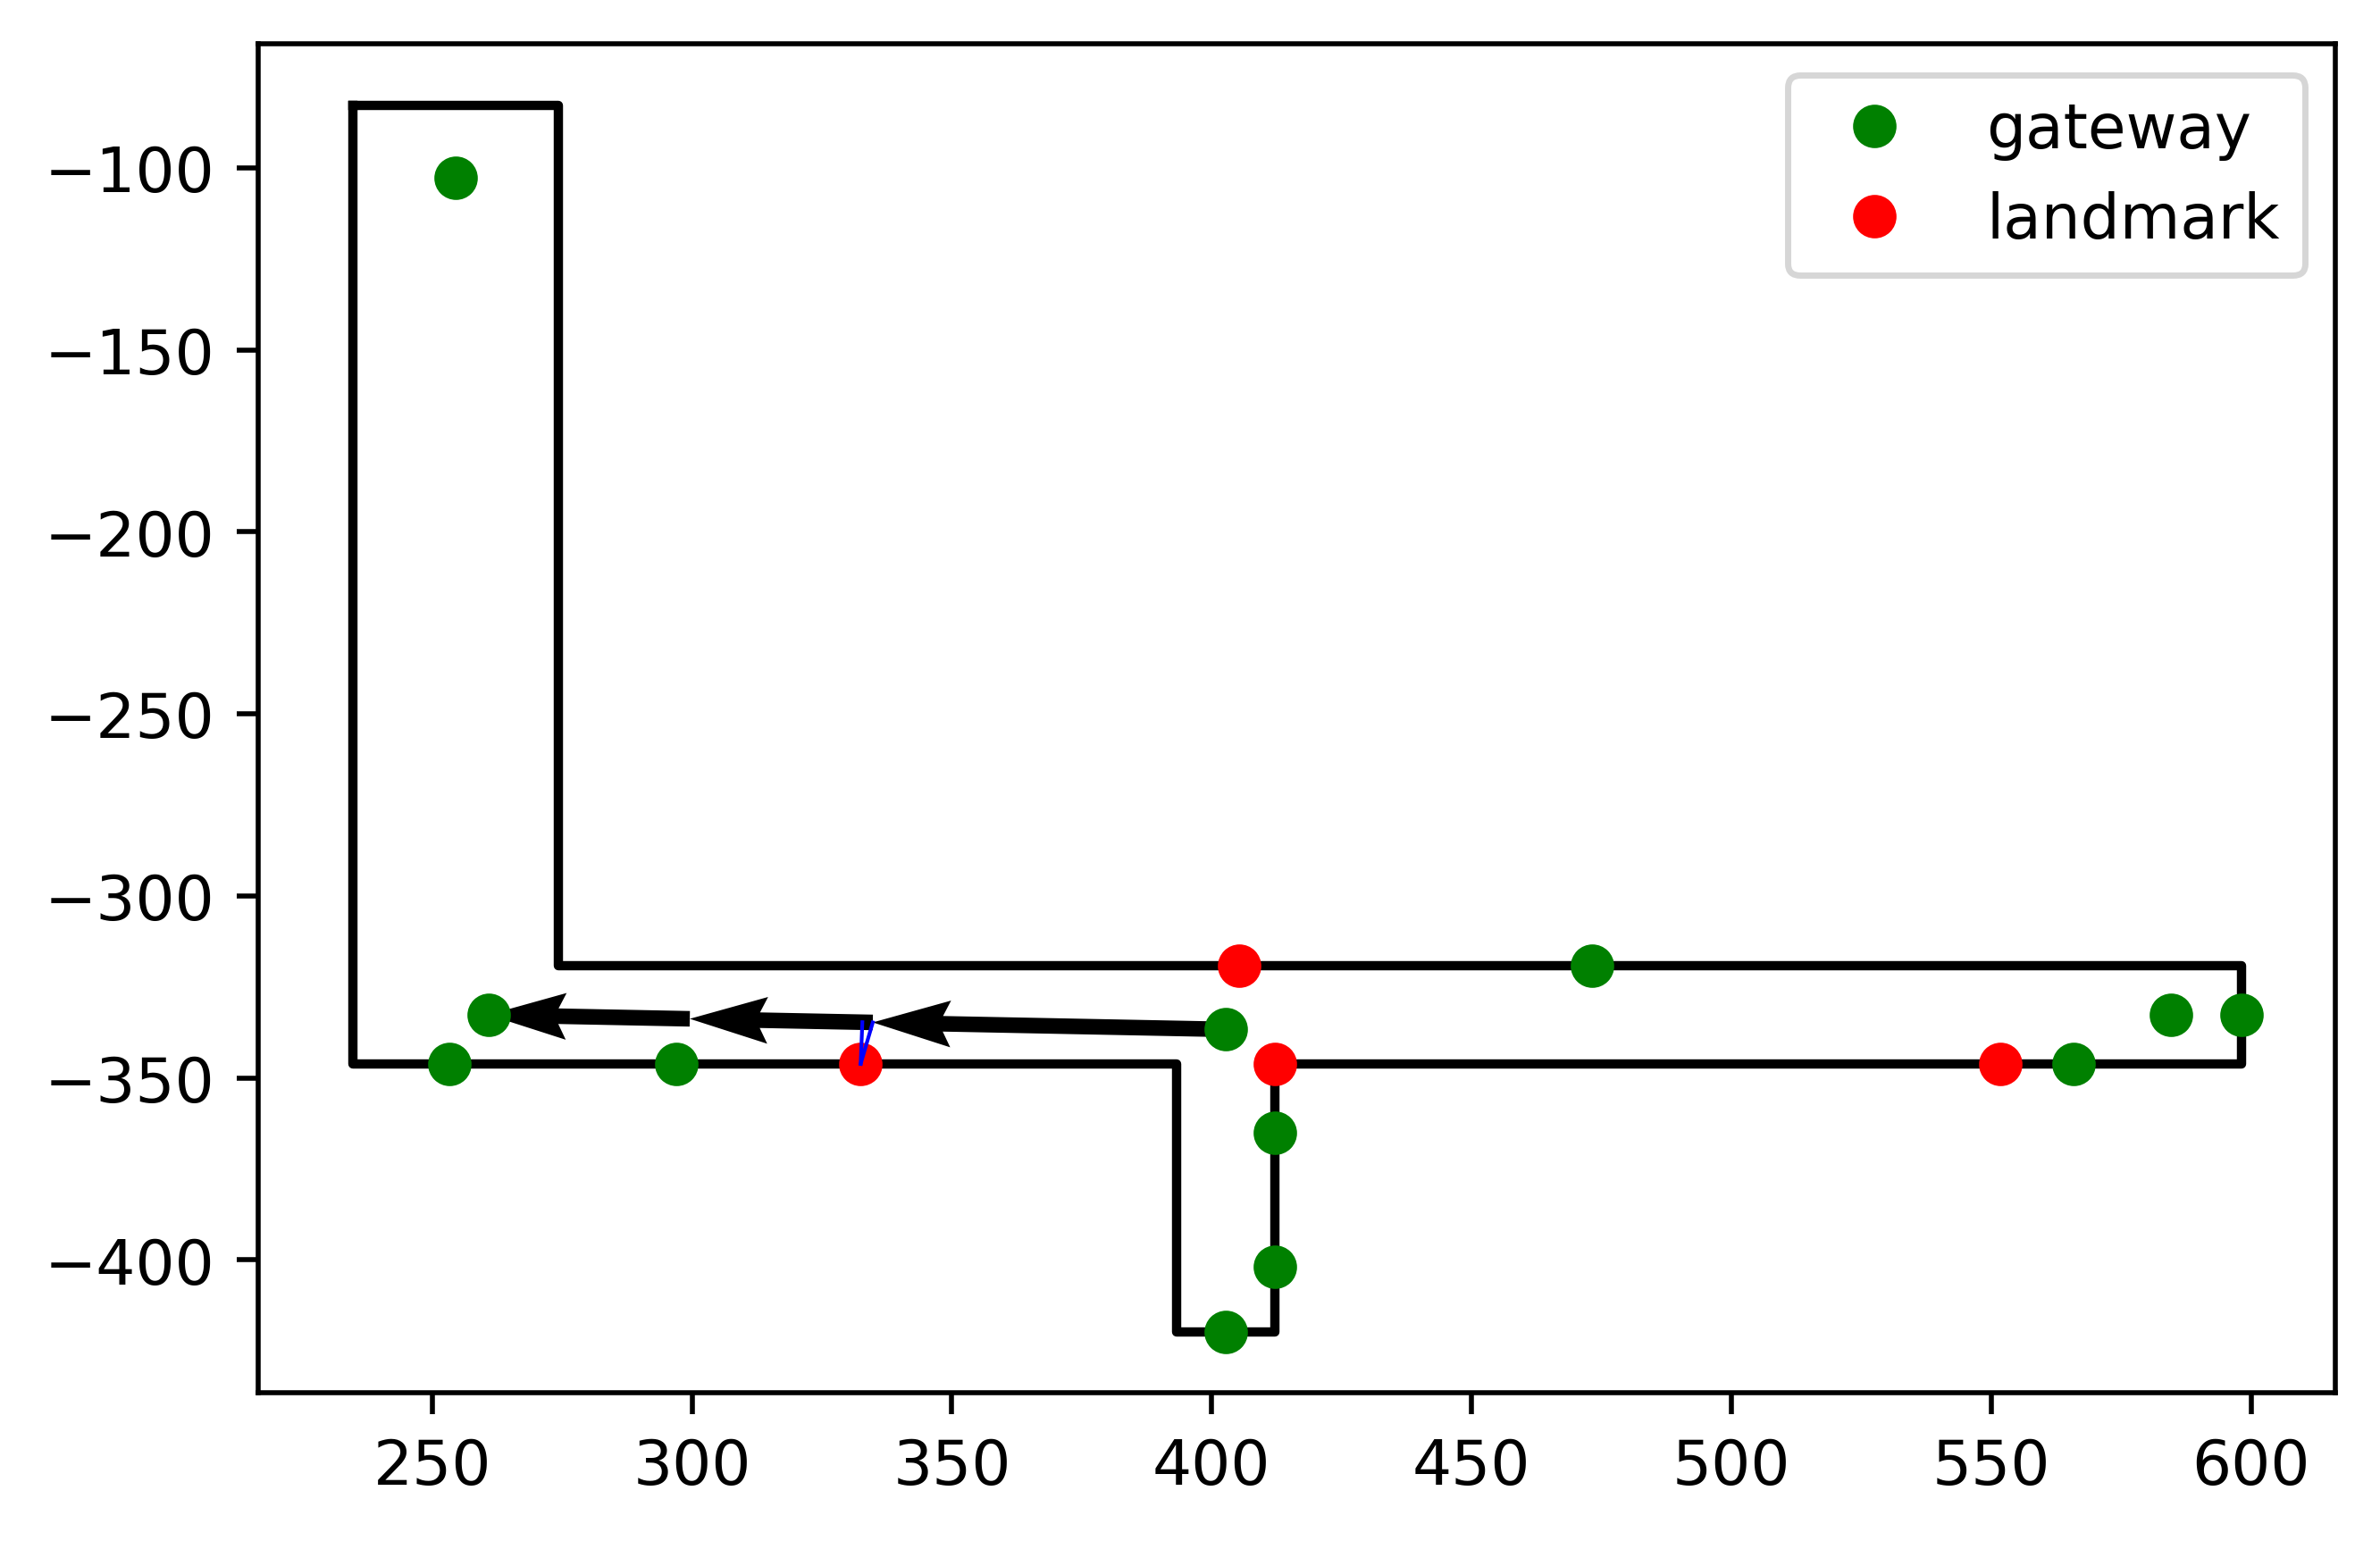

<Figure size 3000x2000 with 0 Axes>

In [57]:
plotter = Plotter()
plotter.add_isovist(isovist_object)
plotter.add_views([vg.rviews[idx] for idx in vlist])
plotter.get_plt().plot([lpoint.x, point.x], [lpoint.y, point.y], 'blue', linewidth=0.6)
plotter.get_plt().plot([lpoint.x, vg.rviews[361][1].x], [lpoint.y, vg.rviews[361][1].y], 'blue', linewidth=0.6)
# plotter.add_points_lines([[lpoint, vg.rviews[361][1]]], False)
# plotter.add_points_lines([[lpoint, point]], False, 'blue')
plotter.show()
plotter.close()